In [1]:
# Import dependencies
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)

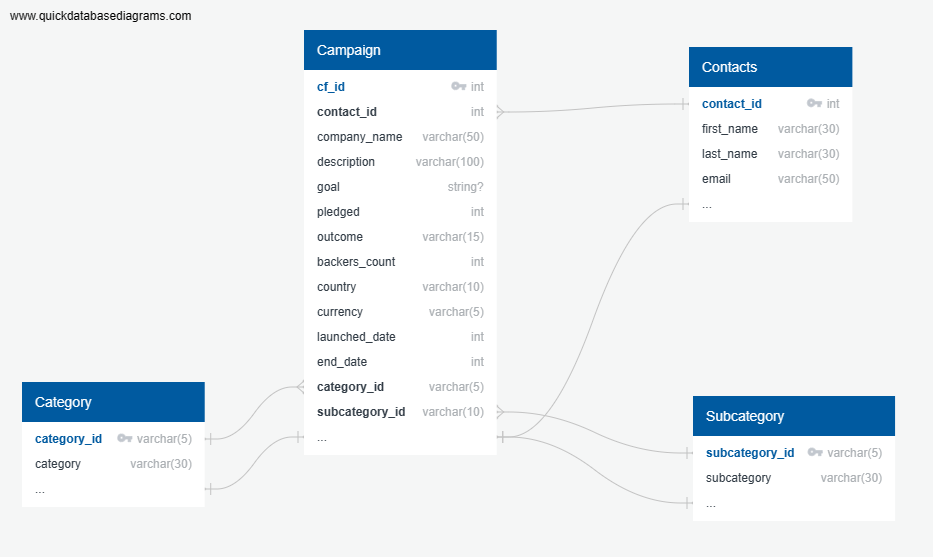

In [2]:
from IPython.display import Image

# Provide the path to your saved image file
image_path = 'Resources/QuickDBD-Free Diagram.png'

# Display the image
Image(filename=image_path)


### Extract the crowdfunding.xlsx Data

In [3]:
# Read the data into a Pandas DataFrame
crowdfunding_info_df = pd.read_excel('Resources/crowdfunding.xlsx')
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [4]:
# Get a brief summary of the crowdfunding_info DataFrame.
crowdfunding_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cf_id                    1000 non-null   int64 
 1   contact_id               1000 non-null   int64 
 2   company_name             1000 non-null   object
 3   blurb                    1000 non-null   object
 4   goal                     1000 non-null   int64 
 5   pledged                  1000 non-null   int64 
 6   outcome                  1000 non-null   object
 7   backers_count            1000 non-null   int64 
 8   country                  1000 non-null   object
 9   currency                 1000 non-null   object
 10  launched_at              1000 non-null   int64 
 11  deadline                 1000 non-null   int64 
 12  staff_pick               1000 non-null   bool  
 13  spotlight                1000 non-null   bool  
 14  category & sub-category  1000 non-null   

### Create the Category and Subcategory DataFrames
---
**Create a Category DataFrame that has the following columns:**
* A "category_id" column that has entries going sequentially from "cat1" to "cat*n*", where *n* is the number of unique categories
* A "category" column that contains only the category titles

Export the DataFrame as a `category.csv` CSV file.

**Create a SubCategory DataFrame that has the following columns:**
* A "subcategory_id" column that has entries going sequentially from "subcat1" to "subcat*n*", where *n* is the number of unique subcategories
* A "subcategory" column that contains only the subcategory titles

Export the DataFrame as a `subcategory.csv` CSV file.

In [5]:
# Get the crowdfunding_info_df columns.
columns_list = crowdfunding_info_df.columns
print(columns_list)

Index(['cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 'pledged',
       'outcome', 'backers_count', 'country', 'currency', 'launched_at',
       'deadline', 'staff_pick', 'spotlight', 'category & sub-category'],
      dtype='object')


In [6]:
# Assign the category and subcategory values to category and subcategory columns.
crowdfunding_info_df[['category','subcategory']]= \
                    crowdfunding_info_df['category & sub-category'].str.split('/',expand=True)
crowdfunding_info_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [7]:
# Get the unique categories and subcategories in separate lists.
categories=list(crowdfunding_info_df['category'].unique())
subcategories=list(crowdfunding_info_df['subcategory'].unique())

print(categories)
print(subcategories)

['food', 'music', 'technology', 'theater', 'film & video', 'publishing', 'games', 'photography', 'journalism']
['food trucks', 'rock', 'web', 'plays', 'documentary', 'electric music', 'drama', 'indie rock', 'wearables', 'nonfiction', 'animation', 'video games', 'shorts', 'fiction', 'photography books', 'radio & podcasts', 'metal', 'jazz', 'translations', 'television', 'mobile games', 'world music', 'science fiction', 'audio']


In [8]:
# Get the number of distinct values in the categories and subcategories lists.
print(len(categories))
print(len(subcategories))

9
24


In [9]:
# Create numpy arrays from 1-9 for the categories and 1-24 for the subcategories.
category_ids = np.arange(1, len(categories)+1)
subcategory_ids = np.arange(1, len(subcategories)+1)

print(category_ids)
print(subcategory_ids)

[1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [10]:
# Use a list comprehension to add "cat" to each category_id. 
cat_ids=['cat' + str(id) for id in category_ids]
# Use a list comprehension to add "subcat" to each subcategory_id.    
scat_ids=['subcat' + str(id) for id in subcategory_ids]
    
print(cat_ids)
print(scat_ids)

['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['subcat1', 'subcat2', 'subcat3', 'subcat4', 'subcat5', 'subcat6', 'subcat7', 'subcat8', 'subcat9', 'subcat10', 'subcat11', 'subcat12', 'subcat13', 'subcat14', 'subcat15', 'subcat16', 'subcat17', 'subcat18', 'subcat19', 'subcat20', 'subcat21', 'subcat22', 'subcat23', 'subcat24']


In [11]:
# Create a category DataFrame with the category_id array as the category_id and categories list as the category name.
category_df=pd.DataFrame({'category_id': cat_ids, 'category': categories})
# Create a category DataFrame with the subcategory_id array as the subcategory_id and subcategories list as the subcategory name. 
subcategory_df=pd.DataFrame({'subcategory_id': scat_ids, 'subcategory': subcategories})

In [12]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [13]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [14]:
# Export categories_df and subcategories_df as CSV files.
category_df.to_csv("Resources/category.csv", index=False)

subcategory_df.to_csv("Resources/subcategory.csv", index=False)

### Campaign DataFrame
----
**Create a Campaign DataFrame that has the following columns:**
- The "cf_id" column.
- The "contact_id" column.
- The “company_name” column.
- The "blurb" column is renamed as "description."
- The "goal" column.
- The "goal" column is converted to a `float` datatype.
- The "pledged" column is converted to a `float` datatype. 
- The "backers_count" column. 
- The "country" column.
- The "currency" column.
- The "launched_at" column is renamed as "launch_date" and converted to a datetime format. 
- The "deadline" column is renamed as "end_date" and converted to a datetime format.
- The "category_id" with the unique number matching the “category_id” from the category DataFrame. 
- The "subcategory_id" with the unique number matching the “subcategory_id” from the subcategory DataFrame.
- And, create a column that contains the unique four-digit contact ID number from the `contact.xlsx` file.
 

Then export the DataFrame as a `campaign.csv` CSV file.


In [15]:
# Create a copy of the crowdfunding_info_df DataFrame name campaign_df. 
campaign_df = crowdfunding_info_df.copy()
campaign_df.head()

,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [16]:
# Rename the blurb, launched_at, and deadline columns.
campaign_df = campaign_df.rename(columns={'blurb': 'description', 'launched_at': 'launched_date', 'deadline': 'end_date'})

# Display the DataFrame with renamed columns
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [17]:
# Convert the goal and pledged columns to a `float` data type.
campaign_df['goal'] = campaign_df['goal'].astype(float)
campaign_df['pledged'] = campaign_df['pledged'].astype(float)

# Display the DataFrame with the converted columns
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1611554400,1621918800,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,1634792400,1642399200,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays,theater,plays


In [18]:
# Check the datatypes
data_types = campaign_df.dtypes

# Display the data types
print(data_types)

cf_id                        int64
contact_id                   int64
company_name                object
description                 object
goal                       float64
pledged                    float64
outcome                     object
backers_count                int64
country                     object
currency                    object
launched_date                int64
end_date                     int64
staff_pick                    bool
spotlight                     bool
category & sub-category     object
category                    object
subcategory                 object
dtype: object


In [19]:
# Format the launched_date and end_date columns to datetime format
from datetime import datetime as dt
campaign_df['launched_date'] = pd.to_datetime(campaign_df['launched_date'], unit='s')
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'], unit='s')

# Display the DataFrame with formatted columns
campaign_df.head()

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,False,False,food/food trucks,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,False,True,music/rock,music,rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,False,False,technology/web,technology,web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,False,False,music/rock,music,rock
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,False,False,theater/plays,theater,plays


In [20]:
# Merge the campaign_df with the category_df on the "category" column and 
# the subcategory_df on the "subcategory" column.
campaign_merged_df = pd.merge(campaign_df, category_df, on='category', how='left')
campaign_merged_df = pd.merge(campaign_merged_df, subcategory_df, on='subcategory', how='left')

campaign_merged_df.tail(10)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,staff_pick,spotlight,category & sub-category,category,subcategory,category_id,subcategory_id
990,1561,5500,Ortiz-Roberts,Devolved foreground customer loyalty,7800.0,6839.0,failed,64,US,USD,2021-06-09 05:00:00,2021-06-18 05:00:00,False,True,film & video/drama,film & video,drama,cat5,subcat7
991,2632,3494,Ramirez LLC,Reduced reciprocal focus group,9800.0,11091.0,successful,241,US,USD,2020-12-09 06:00:00,2021-05-26 05:00:00,False,True,music/rock,music,rock,cat2,subcat2
992,439,3924,Morrow Inc,Networked global migration,3100.0,13223.0,successful,132,US,USD,2020-06-14 05:00:00,2021-02-09 06:00:00,False,True,film & video/drama,film & video,drama,cat5,subcat7
993,461,3521,Erickson-Rogers,De-engineered even-keeled definition,9800.0,7608.0,canceled,75,IT,EUR,2021-07-03 05:00:00,2021-07-08 05:00:00,False,True,photography/photography books,photography,photography books,cat8,subcat15
994,1419,5262,"Leach, Rich and Price",Implemented bi-directional flexibility,141100.0,74073.0,failed,842,US,USD,2021-11-15 06:00:00,2021-12-07 06:00:00,False,True,publishing/translations,publishing,translations,cat6,subcat19
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29 06:00:00,2021-05-30 05:00:00,False,True,food/food trucks,food,food trucks,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15 05:00:00,2021-11-30 06:00:00,False,False,theater/plays,theater,plays,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06 05:00:00,2021-12-10 06:00:00,False,False,theater/plays,theater,plays,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08 05:00:00,2021-04-11 05:00:00,False,True,music/indie rock,music,indie rock,cat2,subcat8
999,1788,4939,"Hernandez, Norton and Kelley",Expanded eco-centric policy,111100.0,62819.0,canceled,1122,US,USD,2020-12-30 06:00:00,2021-08-18 05:00:00,False,False,food/food trucks,food,food trucks,cat1,subcat1


In [21]:
# Drop unwanted columns
columns_to_drop = ['staff_pick', 'spotlight', 'category & sub-category','category', 'subcategory']
campaign_cleaned = campaign_merged_df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping unwanted columns
campaign_cleaned

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,cat4,subcat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29 06:00:00,2021-05-30 05:00:00,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15 05:00:00,2021-11-30 06:00:00,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06 05:00:00,2021-12-10 06:00:00,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08 05:00:00,2021-04-11 05:00:00,cat2,subcat8


In [22]:
# Export the DataFrame as a CSV file. 
campaign_cleaned.to_csv("Resources/campaign.csv", index=False)

### Extract the contacts.xlsx Data.

In [23]:
# Read the data into a Pandas DataFrame. Use the `header=2` parameter when reading in the data.
contact_info_df = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


### Create the Contacts DataFrame 
---
**Create a Contacts DataFrame that has the following columns:**
- A column named "contact_id"  that contains the unique number of the contact person.
- A column named "first_name" that contains the first name of the contact person.
- A column named "last_name" that contains the first name of the contact person.
- A column named "email" that contains the email address of the contact person

Then export the DataFrame as a `contacts.csv` CSV file.

### Option 1: Use Pandas to create the contacts DataFrame.

In [24]:
# Iterate through the contact_info_df and convert each row to a dictionary.
import json
dict_values = []
subset_df = contact_info_df['contact_info']

# Converting the string representation of dictionaries to actual dictionaries
subset_df = subset_df.apply(lambda x: json.loads(x))

for item in subset_df:
    dict_values.append([item['contact_id'], item['name'], item['email']])


# Print out the list of values for each row.
print(dict_values)

[[4661, 'Cecilia Velasco', 'cecilia.velasco@rodrigues.fr'], [3765, 'Mariana Ellis', 'mariana.ellis@rossi.org'], [4187, 'Sofie Woods', 'sofie.woods@riviere.com'], [4941, 'Jeanette Iannotti', 'jeanette.iannotti@yahoo.com'], [2199, 'Samuel Sorgatz', 'samuel.sorgatz@gmail.com'], [5650, 'Socorro Luna', 'socorro.luna@hotmail.com'], [5889, 'Carolina Murray', 'carolina.murray@knight.com'], [4842, 'Kayla Moon', 'kayla.moon@yahoo.de'], [3280, 'Ariadna Geisel', 'ariadna.geisel@rangel.com'], [5468, 'Danielle Ladeck', 'danielle.ladeck@scalfaro.net'], [3064, 'Tatiana Thompson', 'tatiana.thompson@hunt.net'], [4904, 'Caleb Benavides', 'caleb.benavides@rubio.com'], [1299, 'Sandra Hardy', 'sandra.hardy@web.de'], [5602, 'Lotti Morris', 'lotti.morris@yahoo.co.uk'], [5753, 'Reinhilde White', 'reinhilde.white@voila.fr'], [4495, 'Kerry Patel', 'kerry.patel@hutchinson.com'], [4269, 'Sophie Antoine', 'sophie.antoine@andersen.com'], [2226, 'Martha Girard', 'martha.girard@web.de'], [1558, 'Stephanie King', 'step

In [25]:
# Create a contact_info DataFrame and add each list of values, i.e., each row 
# to the 'contact_id', 'name', 'email' columns.
contact_info_df = pd.DataFrame(dict_values, columns=['contact_id', 'name', 'email'])

# Display the resulting DataFrame
contact_info_df

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...
995,3684,Whitney Noack,whitney.noack@laboratorios.org
996,5784,Gelsomina Migliaccio,gelsomina.migliaccio@junk.com
997,1498,Evangelista Pereira,evangelista.pereira@thompson-peterson.biz
998,6073,Gareth Comolli,gareth.comolli@tiscali.fr


In [26]:
# Check the datatypes.
print(contact_info_df.dtypes)

contact_id     int64
name          object
email         object
dtype: object


In [27]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contacts_df_clean = contact_info_df.copy()
contacts_df_clean[['first_name', 'last_name']] = contacts_df_clean['name'].str.split(n=1, expand=True)

# Drop the contact_name column
contacts_df_clean.drop(columns=['name'], inplace=True)

# Displaying the updated DataFrame
contacts_df_clean.head()


,contact_id,email,first_name,last_name
0,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
1,3765,mariana.ellis@rossi.org,Mariana,Ellis
2,4187,sofie.woods@riviere.com,Sofie,Woods
3,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
4,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [28]:
# Reorder the columns
contacts_df_clean = contacts_df_clean[['contact_id', 'first_name', 'last_name', 'email']]

# Displaying the updated DataFrame
contacts_df_clean.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [29]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean.dtypes

contact_id     int64
first_name    object
last_name     object
email         object
dtype: object

In [30]:
# Export the DataFrame as a CSV file. 
contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)

### Option 2: Use regex to create the contacts DataFrame.

In [31]:
contact_info_df_copy = pd.read_excel('Resources/contacts.xlsx', header=3)
contact_info_df_copy.head()

,contact_info
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}"
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}"
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}"
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}"
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}"


In [32]:
# Extract the four-digit contact ID number.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_info'].str.extract(r'"contact_id": (\d{4})')

# Displaying the updated DataFrame
contact_info_df_copy.head()

,contact_info,contact_id
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199


In [33]:
# Check the datatypes.
contact_info_df_copy.dtypes

contact_info    object
contact_id      object
dtype: object

In [34]:
# Convert the "contact_id" column to an int64 data type.
contact_info_df_copy['contact_id'] = contact_info_df_copy['contact_id'].astype('int64')

In [35]:
# Extract the name of the contact and add it to a new column.
contact_info_df_copy['name'] = contact_info_df_copy['contact_info'].str.extract(r'"name": "([^"]+)"')
# Displaying the updated DataFrame
contact_info_df_copy.head()

,contact_info,contact_id,name
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz


In [36]:
# Extract the email from the contacts and add the values to a new column.
contact_info_df_copy['email'] = contact_info_df_copy['contact_info'].str.extract(r'"email": "([^"]+)"')
# Displaying the updated DataFrame
contact_info_df_copy.head()

,contact_info,contact_id,name,email
0,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco"", ""email"": ""cecilia.velasco@rodrigues.fr""}",4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ""email"": ""mariana.ellis@rossi.org""}",3765,Mariana Ellis,mariana.ellis@rossi.org
2,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""email"": ""sofie.woods@riviere.com""}",4187,Sofie Woods,sofie.woods@riviere.com
3,"{""contact_id"": 4941, ""name"": ""Jeanette Iannotti"", ""email"": ""jeanette.iannotti@yahoo.com""}",4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"", ""email"": ""samuel.sorgatz@gmail.com""}",2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [37]:
# Create a copy of the contact_info_df with the 'contact_id', 'name', 'email' columns.
contact_info_subset = contact_info_df_copy[['contact_id', 'name', 'email']].copy()
# Displaying the updated DataFrame
contact_info_subset.head()

,contact_id,name,email
0,4661,Cecilia Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana Ellis,mariana.ellis@rossi.org
2,4187,Sofie Woods,sofie.woods@riviere.com
3,4941,Jeanette Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel Sorgatz,samuel.sorgatz@gmail.com


In [38]:
# Create a "first"name" and "last_name" column with the first and last names from the "name" column. 
contact_info_subset[['first_name', 'last_name']] = contact_info_subset['name'].str.split(n=1, expand=True)

# Drop the contact_name column
contact_info_subset.drop(columns=['name'], inplace=True)

# Displaying the updated DataFrame
contacts_df_clean.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [39]:
# Reorder the columns
contacts_df_clean = contacts_df_clean[['contact_id', 'first_name', 'last_name', 'email']]

# Displaying the updated DataFrame
contacts_df_clean.head()

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com


In [40]:
# Check the datatypes one more time before exporting as CSV file.
contacts_df_clean.dtypes

contact_id     int64
first_name    object
last_name     object
email         object
dtype: object

In [41]:
# Export the DataFrame as a CSV file. 
# contacts_df_clean.to_csv("Resources/contacts.csv", encoding='utf8', index=False)